<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In this notebook, let us try and explore the data given for House Prices: Advanced Regression Techniques. Before we dive deep into the data, let us know a little more about the competition.

What decides a House Price?

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But the ral world experiments proves that price negotiations are much more dependent on other Factors rather than the number of bedrooms or a white-picket fence.

Objective:

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Let's Do Some Real "Work"

We are creating this Notebook to illustrate that how you can "Approach almost any Regression Problem"

A Comprehensive Checklist for Solving Any Regression Problem:

Data Fetching
Understanding the Data
Checking the Skwewness of the Output Variable
Performing Log Transformation (if required)
Exploratory Data Analysis
Analysing Correlation
Finding out Important Predictors
Feature Engineering: -
Missing Values
Outliers
Categorical Feature Encoding
Creating Folds and Defining Fold Map
Defining Models
Fitting the Model and Running Cross Validation
Stacking and Ensembling
Hyperparameter Optimization
The above mentioned checklist is very importnant for solving any regression based problem. The similar kind of checklist can also be prepared for other Machine Learning based problems. I will cover them in my upcoming kernals.

Let's begin!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
%pwd

'C:\\Users\\91994\\Downloads\\house_price'

In [5]:
import os
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/test.csv
./data/train.csv


In [6]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
import seaborn as sns
sns.set(rc={'figure.figsize':(15,12)})
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [9]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
len(train_df.columns)

81

In [11]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Thus,

Total Observations in the Training Data : - 1460
Total Features in the Training Data : - 79, Excluding Id Column and Dependent Variable i.e. SalePrice
Description of the Training Data: -

Mean Value --> 180921.195890
Std. Deviation --> 79442.502883
Min Value --> 34900.00
Max Value --> 755000.00

In [12]:
train_df.shape

(1460, 81)

Now let's have the Training and Testing ID's aved in a dataframe for future references. As you know for any machine learning based problem the Id doesn't make a feature, so we are going to drop the ID column from our train and test dataframe.

In [13]:
train_ID = train_df['Id']
test_ID = test_df['Id']
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)
#Deleting outliers
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index)

Here, SalePrice is what we have to Predict. So we will first start with Checking the Distribution of the Variable and Let's see how much Skewness it has got.

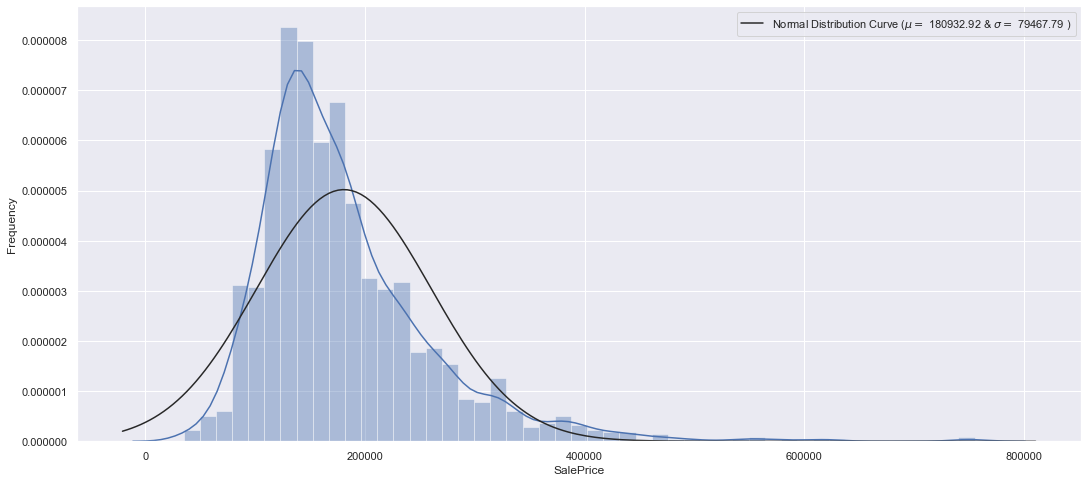

In [14]:
sns.set(rc={'figure.figsize':(18,8)})
sns.distplot(train_df['SalePrice'],fit=norm)

(mu, sig) = norm.fit(train_df['SalePrice'])
#Now plot the distribution
plt.legend(['Normal Distribution Curve ($\mu=$ {:.2f} & $\sigma=$ {:.2f} )'.format(mu, sig)])
plt.ylabel('Frequency')
plt.show()

By Analyzing the Graph we can see the following:

Deviation from the Normal Distribution.
Have Positive Skewness.
Show Peakedness
Also let's see the measurement of Skewness:

In [15]:
print("Skewness of Sale Price is: ",train_df['SalePrice'].skew())

Skewness of Sale Price is:  1.8812964895244009


Looks like our Data is Skewed Towards Right.

We are normalising the data by simply takithe Natural Log and then adding 1.
Why do we need to make the Data Normal?

Since Machine Learning or Data Science is nothing but Glorified Statistics at the end of the day and most of the algorithms assumes that the data is that the data is normal and it calculates various stats assuming this. So the more the data is close to normal, the better it fits the assumption.

Log Transformation: -

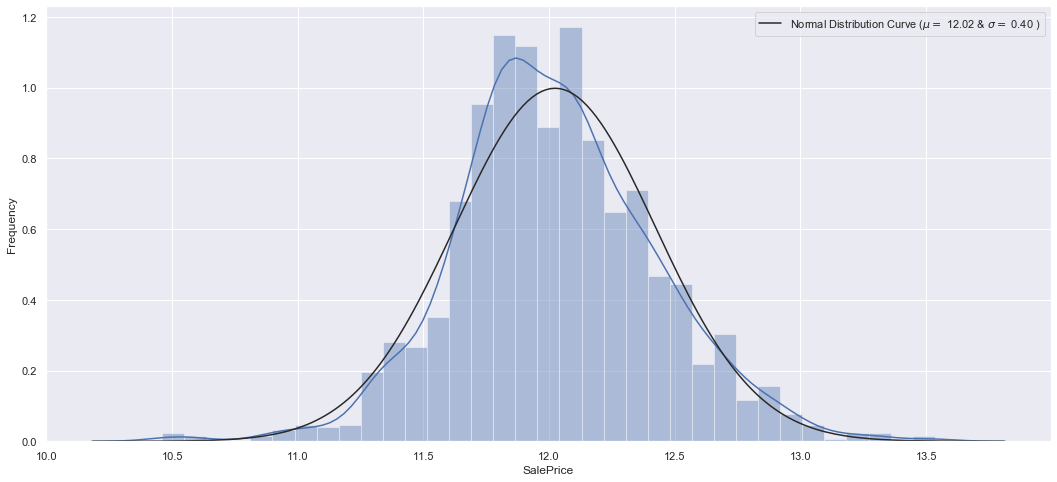

In [16]:
train_df['SalePrice'] = np.log(train_df['SalePrice']+1)
sns.distplot(train_df['SalePrice'],fit=norm)

(mu, sig) = norm.fit(train_df['SalePrice'])
#Now plot the distribution
plt.legend(['Normal Distribution Curve ($\mu=$ {:.2f} & $\sigma=$ {:.2f} )'.format(mu, sig)])
plt.ylabel('Frequency')
plt.show()

This is the Normalised Data

In [17]:
print("Skewness of Sale Price is: ",train_df['SalePrice'].skew())

Skewness of Sale Price is:  0.12157976050304882


Now, Let's do Some More Feature Analysis

The First and Foremost Important thing is to See that What are the Relevant Features. Not all features might be useful for our prediction and Having all the unnecessary features is going to make our model complex and we don't want the dimensionality to be huge!

Let's Generate the Correlation Matrix

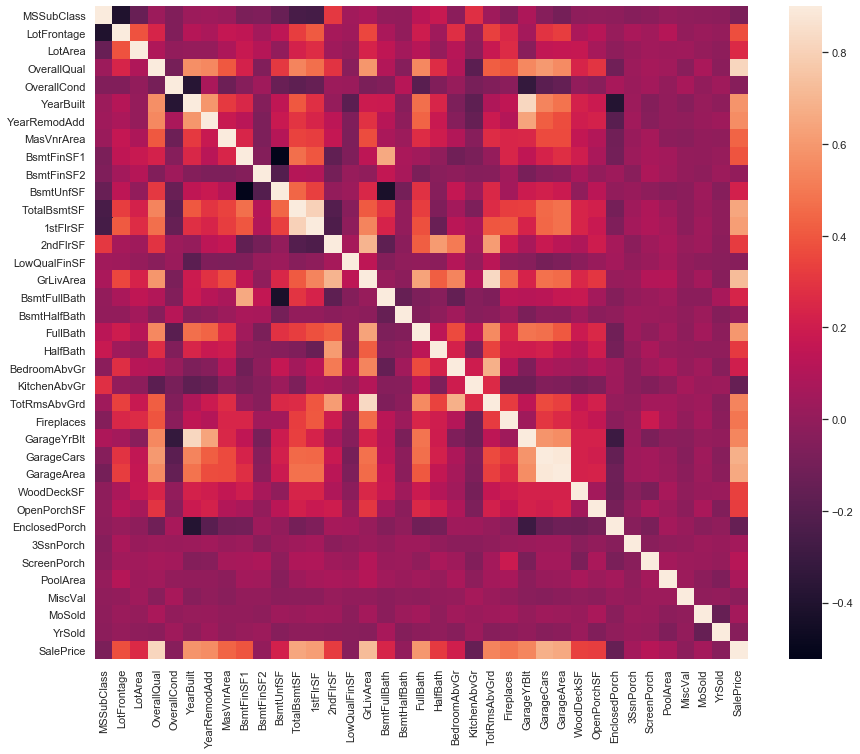

In [18]:
corremap = train_df.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corremap, vmax=0.9, square=True)

From the Correlation Map, We Got:

OverallQual, GrLivArea, TotalBsmtSF, GarrageCars, GarrageArea, 1stFlrSF, YearBuilt, FullBath are the most important Predictors.
We can see from the above graph that how significantly they are related to our output variable "SalePrice"
Let's have an Eagle's Eye View!

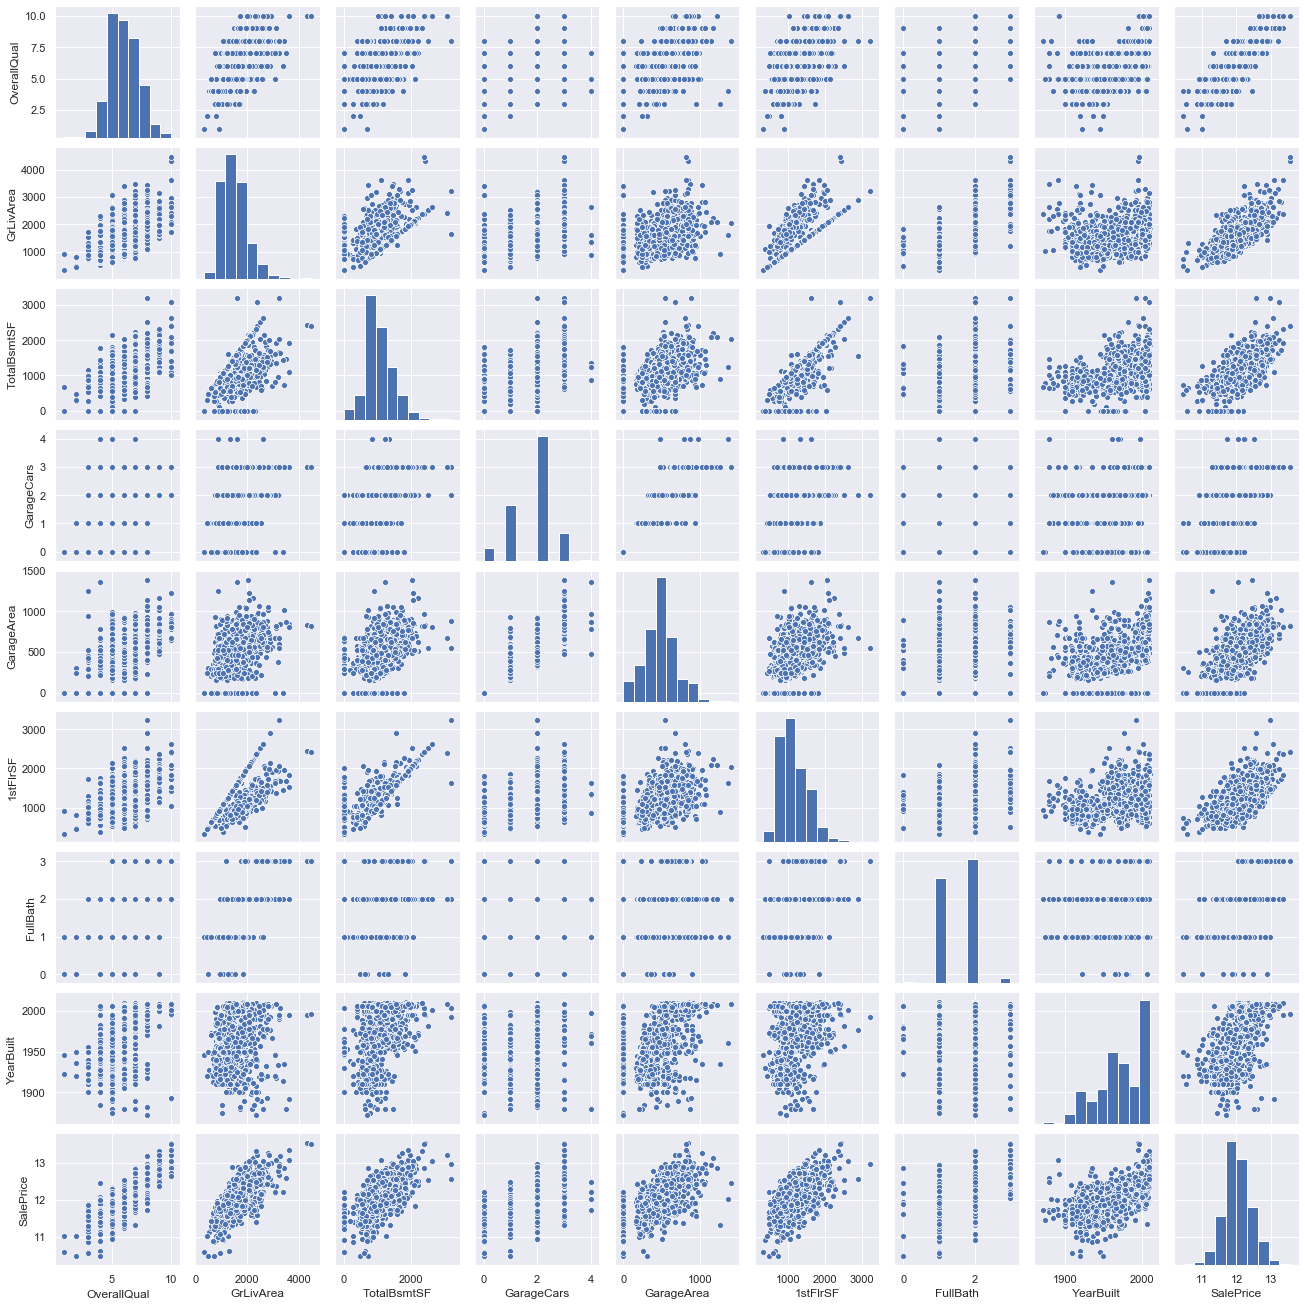

In [19]:
sns.set()
columns = ['OverallQual', 'GrLivArea', 'TotalBsmtSF','GarageCars', 'GarageArea','1stFlrSF', 'FullBath', 'YearBuilt','SalePrice']
sns.pairplot(train_df[columns], size = 2)
plt.show();

According to our tarot card, these are the variables most correlated with 'SalePrice'

'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers.
'TotalBsmtSF' and '1stFloor' also seem to be twin brothers.
'FullBath'?? Really?
'TotRmsAbvGrd' and 'GrLivArea', twin brothers again.
It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right.
Now Let's See the Relationship Between the Predictors and the "SalePrice"

Let's See who makes the Best Couple?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


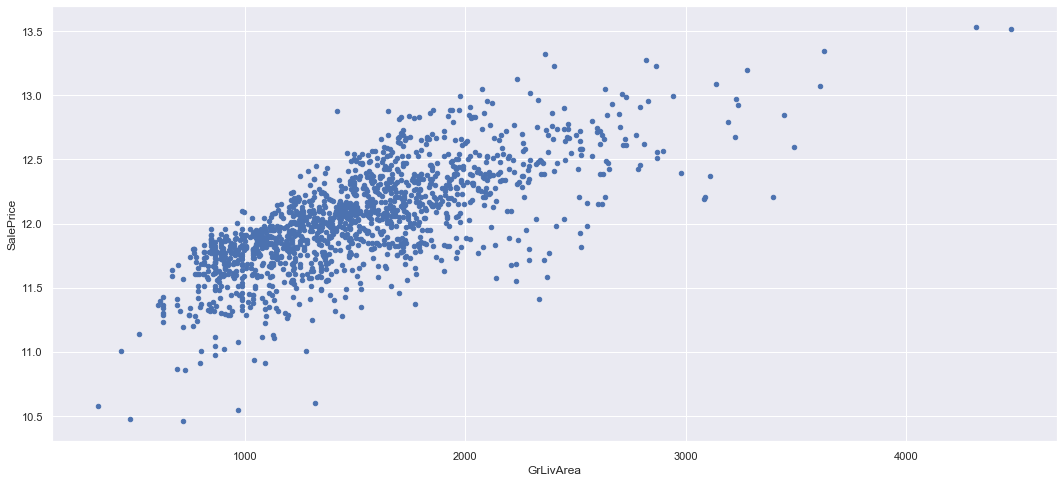

In [20]:
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(var,'SalePrice');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


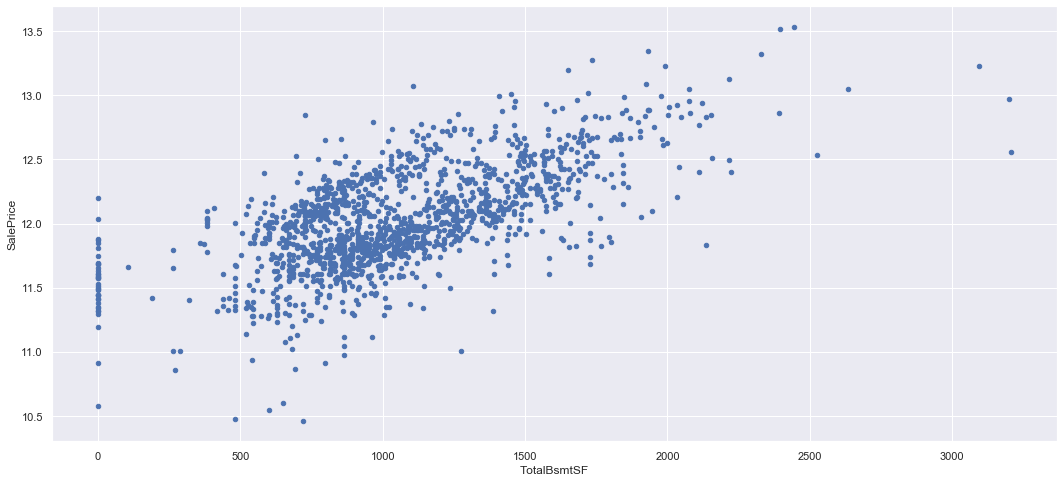

In [21]:
#scatter plot grlivarea/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(var,'SalePrice');


'TotalBsmtSF' also have a great bond with 'SalePrice' but this seems a much more emotional relationship! Everything is ok and suddenly, in a strong linear (exponential?) reaction, everything changes. We can call it a Mood Swing! Moreover, it's clear that sometimes 'TotalBsmtSF' closes in itself and gives no credit to 'SalePrice'.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


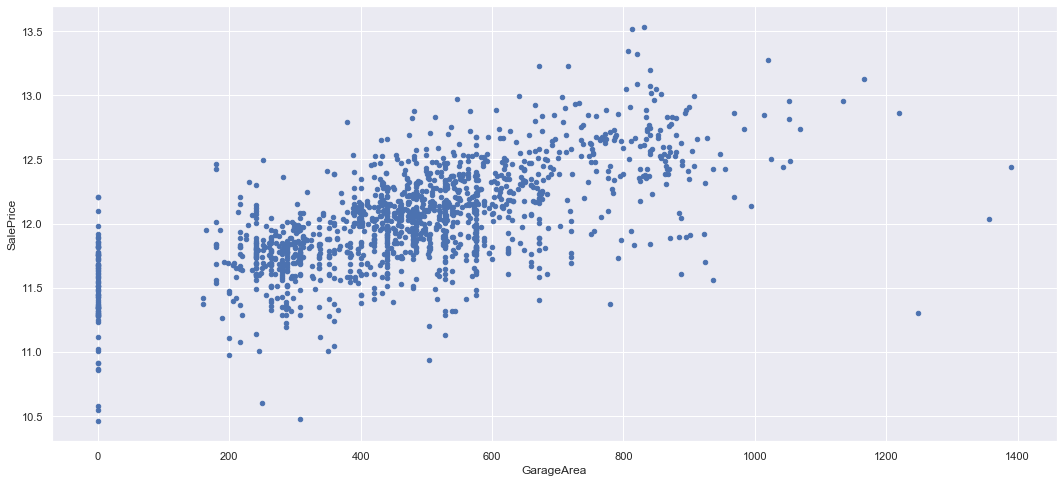

In [24]:
#scatter plot grlivarea/saleprice
var = 'GarageArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(var,'SalePrice');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


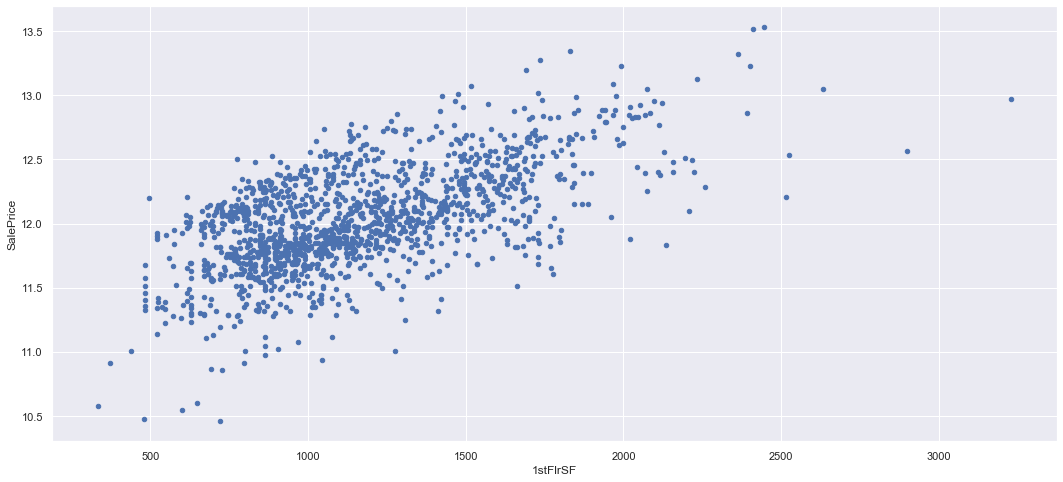

In [25]:
#scatter plot grlivarea/saleprice
var = '1stFlrSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(var, 'SalePrice');

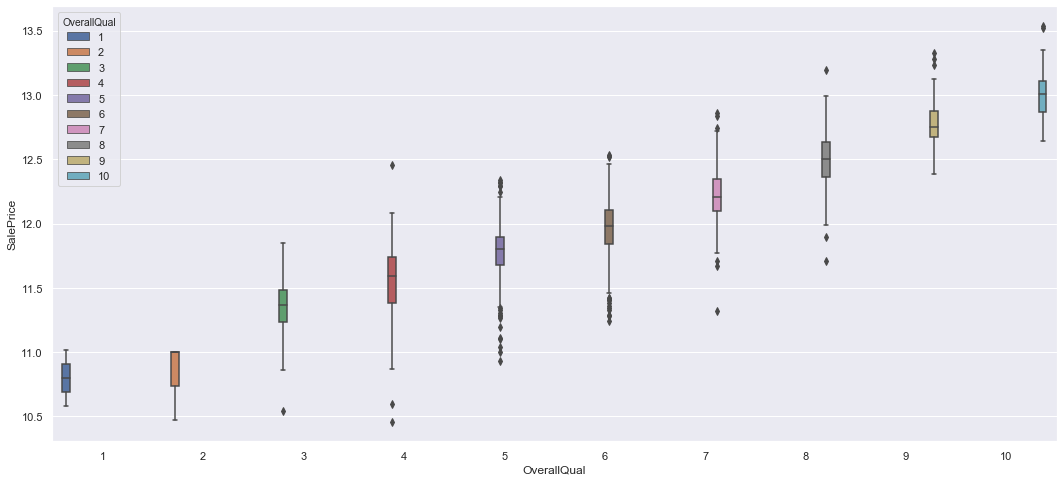

In [26]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
sns.boxplot(x=var,y='SalePrice',hue=var,data=data)

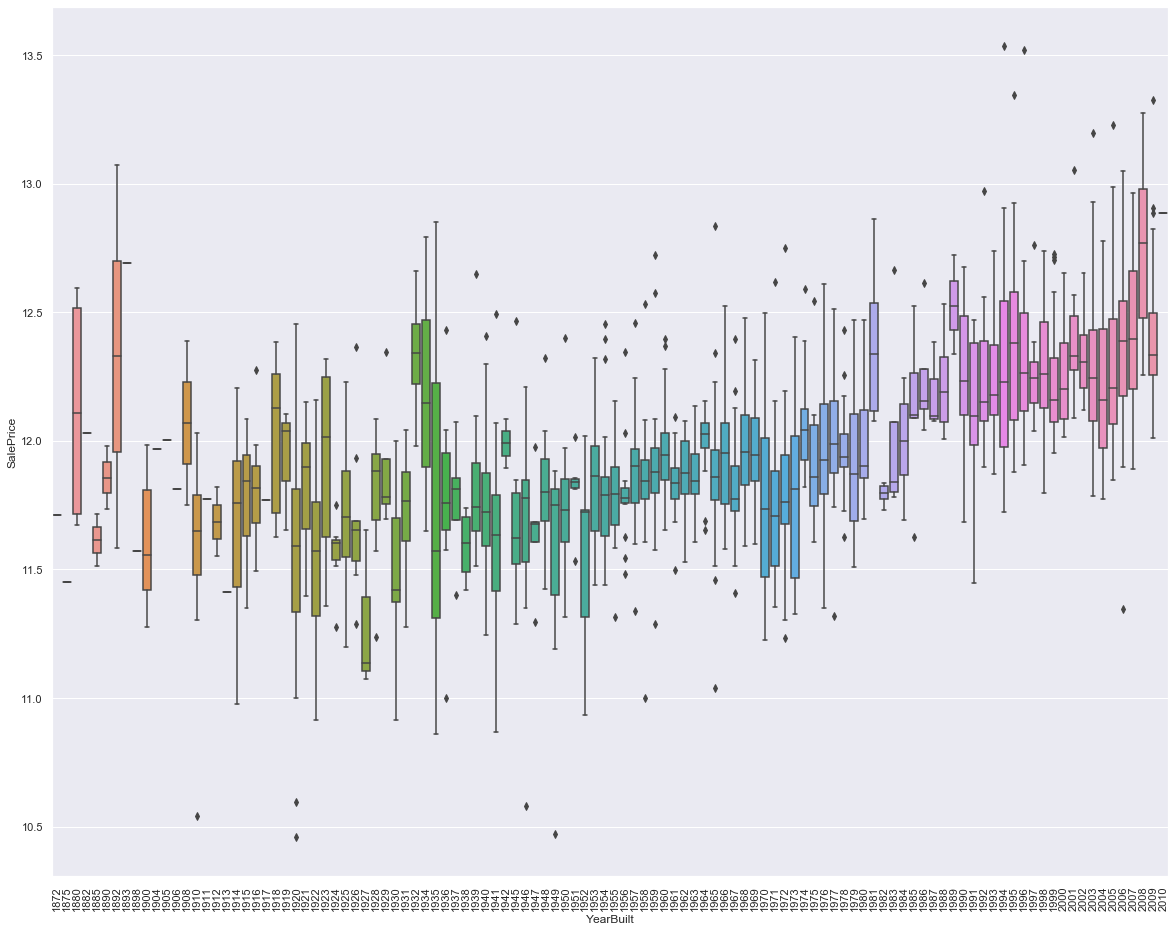

In [27]:
#box plot overallqual/saleprice
f, ax = plt.subplots(figsize=(20, 16))
plt.xticks(rotation='90')
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
sns.boxplot(x=var,y='SalePrice',data=data)

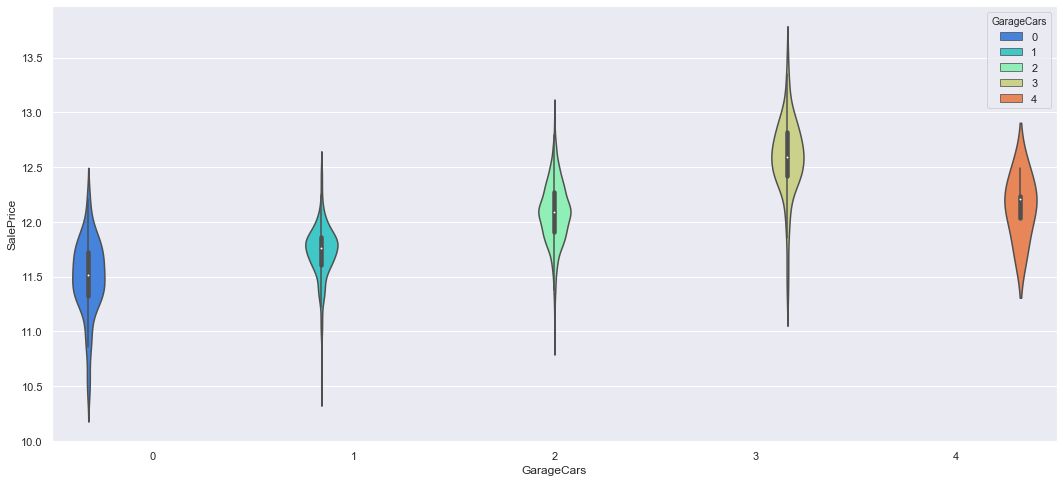

In [28]:
#box plot overallqual/saleprice
var = 'GarageCars'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
sns.violinplot(x=var,y='SalePrice',data=data,palette='rainbow', hue = 'GarageCars')

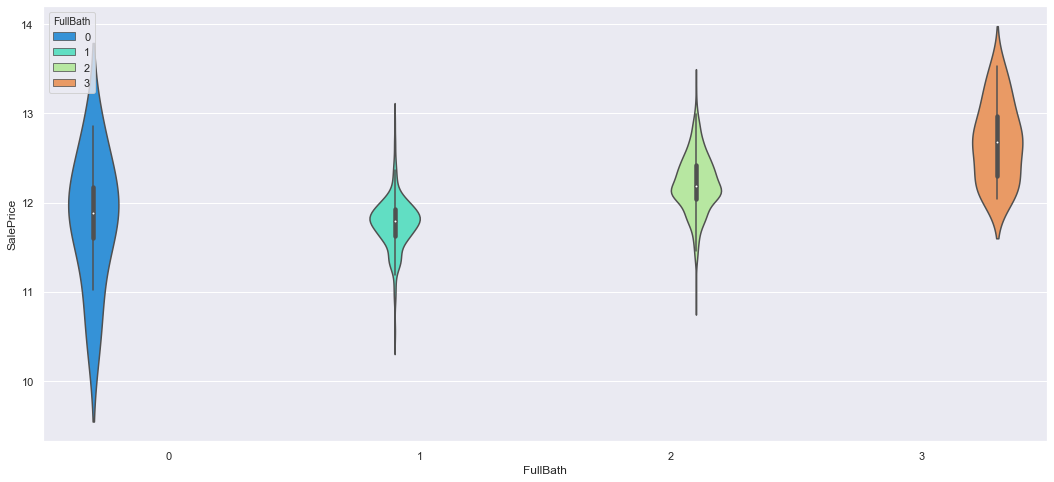

In [29]:
var = 'FullBath'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
sns.violinplot(x=var,y='SalePrice',data=data,palette='rainbow', hue = 'FullBath')

Now that we are done with most of the Feature Analysis, Let's Beging with the Feature Engineering!

Let's Concat the Training and the Test Data to a Complete Dataframe. This has to be done because both our training and testing data might contain missing values, outliers and may require categorical features to be handelled.

Therefore rather than doing them seperatly we can do it together to save our time, so that we can waste the time somewhere else!



In [30]:
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y_train = train_df.SalePrice.values
comp_data = pd.concat((train_df, test_df)).reset_index(drop=True)
comp_data.drop(['SalePrice'], axis=1, inplace=True)
print("Comp_data size is : {}".format(comp_data.shape))

Comp_data size is : (2917, 79)


In [31]:
missing_val = comp_data.isnull().sum().sort_values(ascending=False)
missing_val_df = pd.DataFrame({'Feature':missing_val.index, 'Count':missing_val.values})
missing_val_df = missing_val_df.drop(missing_val_df[missing_val_df.Count == 0].index)
missing_val_df

,Feature,Count
0,PoolQC,2908
1,MiscFeature,2812
2,Alley,2719
3,Fence,2346
4,FireplaceQu,1420
5,LotFrontage,486
6,GarageFinish,159
7,GarageQual,159
8,GarageYrBlt,159
9,GarageCond,159


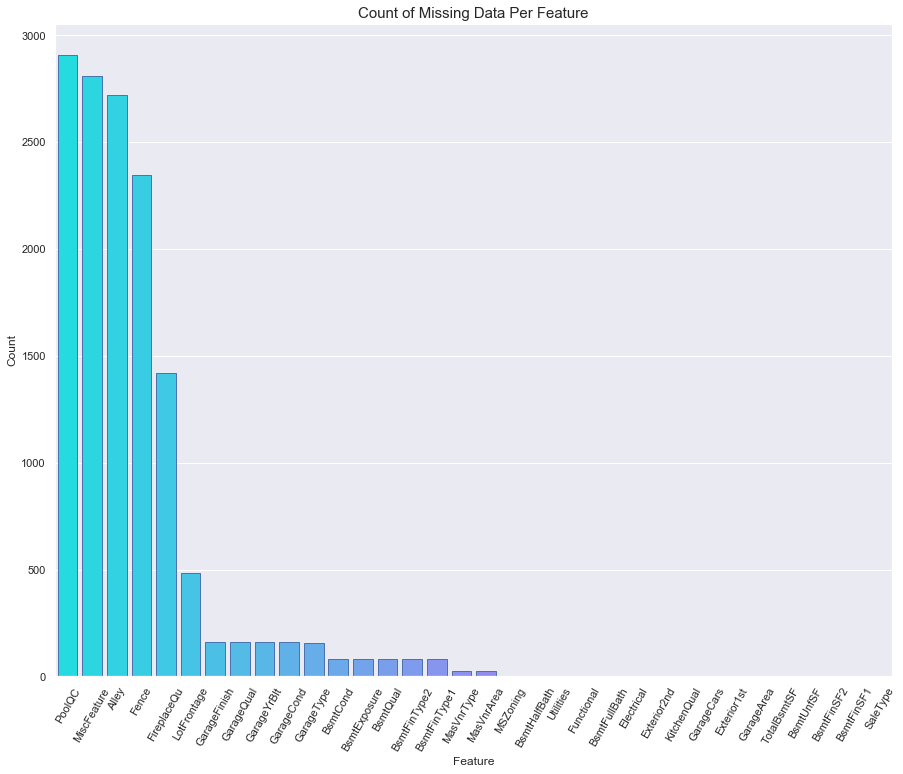

In [32]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='60')
plt.title('Count of Missing Data Per Feature', fontsize=15)
sns.barplot(x = 'Feature', y = 'Count', data = missing_val_df,
            palette = 'cool', edgecolor = 'b')


Now it looks Beautiful!

So, there are 2920 observations in are Complete dataframe, i,.e 1460 in both train and test dataframe. Now if we see the top three predictors from our missing value dataframe we see that most of them are close to 2920 that means,most of the observations from those predictors are not present.

2. Handling Missing Values in Numerical Data

In [33]:
comp_data["LotFrontage"] = comp_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    comp_data[col] = comp_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    comp_data[col] = comp_data[col].fillna(0)
comp_data['MSZoning'] = comp_data['MSZoning'].fillna(comp_data['MSZoning'].mode()[0])
comp_data["MasVnrArea"] = comp_data["MasVnrArea"].fillna(0)
comp_data['Electrical'] = comp_data['Electrical'].fillna(comp_data['Electrical'].mode()[0])
comp_data['SaleType'] = comp_data['SaleType'].fillna(comp_data['SaleType'].mode()[0])
comp_data['KitchenQual'] = comp_data['KitchenQual'].fillna(comp_data['KitchenQual'].mode()[0])
comp_data['Exterior1st'] = comp_data['Exterior1st'].fillna(comp_data['Exterior1st'].mode()[0])
comp_data['Exterior2nd'] = comp_data['Exterior2nd'].fillna(comp_data['Exterior2nd'].mode()[0])

In [34]:
for col in ('PoolQC', 'MiscFeature', 'Alley'):
    comp_data[col] = comp_data[col].fillna('None')
comp_data["MasVnrType"] = comp_data["MasVnrType"].fillna("None")
comp_data["Fence"] = comp_data["Fence"].fillna("None")
comp_data["FireplaceQu"] = comp_data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    comp_data[col] = comp_data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    comp_data[col] = comp_data[col].fillna('None')
comp_data['MSSubClass'] = comp_data['MSSubClass'].fillna("None")
comp_data['SaleType'] = comp_data['SaleType'].fillna(comp_data['SaleType'].mode()[0])
comp_data = comp_data.drop(['Utilities'], axis=1)
comp_data['OverallCond'] = comp_data['OverallCond'].astype(str)
comp_data["Functional"] = comp_data["Functional"].fillna("Typ")  

In [35]:
comp_data['MSSubClass'] = comp_data['MSSubClass'].apply(str)
comp_data['YrSold'] = comp_data['YrSold'].astype(str)
comp_data['MoSold'] = comp_data['MoSold'].astype(str)
from sklearn.preprocessing import LabelEncoder
columns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for col in columns:
    labl = LabelEncoder() 
    labl.fit(list(comp_data[col].values)) 
    comp_data[col] = labl.transform(list(comp_data[col].values))     
print('Shape all_data: {}'.format(comp_data.shape))
comp_data['TotalSF'] = comp_data['TotalBsmtSF'] + comp_data['1stFlrSF'] + comp_data['2ndFlrSF']

Shape all_data: (2917, 78)


In [36]:
from scipy.stats import norm, skew
numeric_feats = comp_data.dtypes[comp_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = comp_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [37]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    comp_data[feat] = boxcox1p(comp_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [38]:
comp_data = pd.get_dummies(comp_data)
print(comp_data.shape)

(2917, 220)


In [39]:
train_df = comp_data[:ntrain]
test_df = comp_data[ntrain:]

from sklearn.model_selection import KFold, cross_val_score, train_test_split
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_df.values)
    rmse= np.sqrt(-cross_val_score(model, train_df.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge,ElasticNet,Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)

ElasticNet score: 0.1116 (0.0074)

Kernel Ridge score: 0.1153 (0.0075)

Gradient Boosting score: 0.1177 (0.0080)

Xgboost score: 0.1165 (0.0072)

LGBM score: 0.1151 (0.0069)



In [42]:
from sklearn.metrics import mean_squared_error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [43]:
model_xgb.fit(train_df, y_train)
xgb_train_pred = model_xgb.predict(train_df)
xgb_pred = np.expm1(model_xgb.predict(test_df))
print(rmsle(y_train, xgb_train_pred))

0.0794998911231869


In [44]:
model_lgb.fit(train_df, y_train)
lgb_train_pred = model_lgb.predict(train_df)
lgb_pred = np.expm1(model_lgb.predict(test_df.values))
print(rmsle(y_train, lgb_train_pred))

0.07210084277592503


In [45]:
ensemble = xgb_pred*0.5 + lgb_pred*0.5

In [46]:
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = ensemble

print("Creating Submission File")
submission.to_csv("submission.csv", index=False)

Creating Submission File
